In [2]:
import sys
print(sys.path)

['', '/home/longa/anaconda3/lib/python36.zip', '/home/longa/anaconda3/lib/python3.6', '/home/longa/anaconda3/lib/python3.6/lib-dynload', '/home/longa/anaconda3/lib/python3.6/site-packages', '/home/longa/anaconda3/lib/python3.6/site-packages/xgboost-0.71-py3.6.egg', '/home/longa/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/longa/.ipython']


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import os.path
import pandas
import time
import xgboost as xgb
import sys
import matplotlib.pyplot as plt
import io
import re
import sys
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [4]:
from IPython.display import clear_output
%load_ext memory_profiler
%matplotlib inline

In [4]:
df = pd.read_csv("/home/longa/03_tarolo/BME/dap/nagyhazi/autos_training_final.csv",sep='|')

In [6]:
df.shape

(250152, 20)

In [7]:
pd.set_option('display.max_columns', None) 
df.head(3)

,dateCrawled,name,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,id,label
0,2016-03-14 12:52:21,Jeep_Grand_Cherokee_'Overland',privat,Angebot,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46,3.0,1
1,2016-03-17 16:54:04,GOLF_4_1_4__3T?RER,privat,Angebot,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17,4.0,0
2,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,2016-04-04 00:00:00,0.0,33775.0,2016-04-06 19:17:07,6.0,0


### var: dateCrawled 

In [8]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'],format = "%Y/%m/%d %H:%M:%S")

In [9]:
df['dateCrawled'].describe()

count                  250152
unique                 207851
top       2016-03-22 14:50:05
freq                        5
first     2016-03-05 14:06:23
last      2016-04-07 14:36:58
Name: dateCrawled, dtype: object

In [12]:
pd.set_option('display.max_columns', None) 
df.head(3)

,dateCrawled,name,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,id,label
0,2016-03-14 12:52:21,Jeep_Grand_Cherokee_'Overland',privat,Angebot,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46,3.0,1
1,2016-03-17 16:54:04,GOLF_4_1_4__3T?RER,privat,Angebot,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17,4.0,0
2,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,2016-04-04 00:00:00,0.0,33775.0,2016-04-06 19:17:07,6.0,0


### var: name

In [13]:
df.loc[:,'name'].describe()

count          250152
unique         162475
top       Ford_Fiesta
freq              468
Name: name, dtype: object

In [14]:
from collections import Counter

In [15]:
df_name_full_countr = Counter(df.loc[:,'name'])
df_name_full_countr = pd.Series(df_name_full_countr).sort_values(ascending=False)
len(df_name_full_countr)

162475

In [16]:
df_name_full_countr[df_name_full_countr > 100][0:5]

Ford_Fiesta            468
Opel_Corsa             446
BMW_318i               437
Volkswagen_Golf_1.4    432
BMW_316i               360
dtype: int64

In [17]:
df_name = df.loc[:,'name'].tolist()
len(df_name)

250152

In [18]:
df_name_uniq = df.loc[:,'name'].tolist()
t = [(x.lower()) for x in df_name]
cml = ["'","!","#","$","%","&","*","+","/","~","|",";"," "]
for m in cml:
    t = [x.replace(m," ") for x in t]
len(t)

250152

In [19]:
t2 = [x.replace("benz","") for x in t2]
t2 = [x.replace("romeo","") for x in t2]
t2 = [x.replace("20_v","20v") for x in t2]
t2 = [x.replace("12_v","12v") for x in t2]
t2 = [x.replace("1_hand","1.hand") for x in t2]
t2 = [x.replace("2._hand","2.hand") for x in t2]
t2 = [x.replace("2_hand","2.hand") for x in t2]
t2 = [x.replace("neu.","neu") for x in t2]
t2 = [x.replace("golf4","golf") for x in t2]
t2 = [x.replace("3.0tdi","3.0_tdi") for x in t2]
t2 = [x.replace("neues","neue") for x in t2]
t2 = [x.replace("2.5tdi","2.5 tdi") for x in t2]
t2 = [x.replace("sportfahrwerk","sport") for x in t2]
t2 = [x.replace("1.8l","1.8") for x in t2]
t2 = [x.replace("2.2i","2.0") for x in t2
t2 = [x.replace("neuer","neue") for x in t2]
t2 = [x.replace("new","neue") for x in t2]
t2 = [x.replace("1.6i","1.6") for x in t2]
t2 = [x.replace("2.0t","2.0") for x in t2]
t2 = [x.replace("neuem","neue") for x in t2]
t2 = [x.replace("sportline","sport") for x in t2]
t2 = [x.replace("klimaanlage","klima") for x in t2]
t2 = [x.replace("klimaautomatik","klima") for x in t2]
t2 = [x.replace("citro?n","citroen") for x in t2]
t2 = [x.replace("vw","volkswagen") for x in t2]
t2 = [x.replace("tuv.","tuev") for x in t2]
t2 = [x.replace("cabriolet","cabrio") for x in t2]
t2 = [x.replace("limousineusine","limousine") for x in t2]
t2 = [x.replace("aut.","automatik") for x in t2]
t2 = [x.split('_') for x in t2]
len(t2)

250152

In [20]:
def rvil(xl,str1,str2):
    return [x.replace(str1,str2) for x in xl]
t2 = [rvil(x,"mercedes","mercedes_benz") for x in t2]
t2 = [rvil(x,"alfa","alfa_romeo") for x in t2]

In [21]:
def string_in_row(string,inplist):
    if string in inplist:
        return True
    else:
        return False

In [23]:
df_blist = ['km','ps','auto','in','fach','dpf','an','zum','zu','und','bis','benz',
            '17','16','verkaufen','verkaufe','mit','oder','sitzer', 'fuer','motor','cc','euro',
            'baujahr','moeglich','viele','zulassung','unfall','ausschlachten','sitze','8fach','2016','2017'
           ]

In [24]:
df_brands = df['brand'].unique().tolist()

In [25]:
df_name_string_lt = list(itertools.chain.from_iterable(t2))
df_name_string_lt = [x.strip() for x in df_name_string_lt]
df_name_string_lt = [x for x in df_name_string_lt if len(x)>1]
df_name_string_lt = [x for x in df_name_string_lt if x not in df_brands]
df_name_string_lt = [x for x in df_name_string_lt if x not in df_blist]

In [26]:
"euro" in df_name_string_lt

False

In [27]:
#pd.set_option('display.max_rows', None)
df_name_string_count1 = Counter(df_name_string_lt)
df_name_string_count1 = pd.Series(df_name_string_count1).sort_values(ascending=False)
df_name_string_count1 = df_name_string_count1[df_name_string_count1 > 500]
len(df_name_string_count1)

297

In [28]:
df_vehtype = df['vehicleType'].unique().tolist()
df_model = df['model'].unique().tolist()

In [29]:
df_name_string_lt2 = [x for x in df_name_string_lt if x not in df_vehtype]
df_name_string_lt2 = [x for x in df_name_string_lt2 if x not in df_model]

In [30]:
#pd.set_option('display.max_rows', None)
df_name_string_count12 = Counter(df_name_string_lt2)
df_name_string_count12 = pd.Series(df_name_string_count12).sort_values(ascending=False)
df_name_string_count12 = df_name_string_count12[df_name_string_count12 > 500]
len(df_name_string_count12)

230

In [32]:
pd.set_option('display.max_rows', 1500)
df_name_string_count12

tuev                  26734
tdi                   24774
2.0                   19702
1.6                   13788
1.4                   11658
automatik             11346
klima                 10729
neu                   10305
16v                    9627
sport                  9357
1.2                    8577
1.9                    8299
cdi                    7963
top                    7817
1.8                    7649
edition                6311
navi                   6042
avant                  5282
zustand                5226
variant                4939
touring                4567
leder                  4509
quattro                4265
ahk                    4096
diesel                 4007
xenon                  3967
3.0                    3896
line                   3731
1.0                    3551
200                    3505
dsg                    3341
tsi                    3097
highline               3024
lpg                    3007
comfortline            2945
tronic              

In [33]:
pd.set_option('display.max_rows', 50)

In [34]:
df_vehicletype = dict(zip(df.loc[:,'vehicleType'].unique().tolist(),range(len(df.loc[:,'vehicleType'].unique().tolist()))))
del df_vehicletype[np.nan]
list(df_vehicletype.keys())
fin_wrd_lt = df_name_string_count1.index.values.tolist()
len(fin_wrd_lt)

297

In [35]:
for vt in list(df_vehicletype.keys()):
    if vt not in fin_wrd_lt:
        fin_wrd_lt.append(vt)
len(fin_wrd_lt)

301

In [36]:
df_fuelType = dict(zip(df.loc[:,'fuelType'].unique().tolist(),range(len(df.loc[:,'fuelType'].unique().tolist()))))
del df_fuelType[np.nan]
list(df_fuelType.keys())

['diesel', 'benzin', 'lpg', 'andere', 'hybrid', 'cng', 'elektro']

In [37]:
len(fin_wrd_lt)

301

In [38]:
for vt in list(df_fuelType.keys()):
    if vt not in fin_wrd_lt:
        fin_wrd_lt.append(vt)
len(fin_wrd_lt)

305

In [39]:
for nstr in fin_wrd_lt:
    df.loc[:,nstr] = np.float32(0)
    df.loc[[string_in_row(nstr,r) for r in t2],nstr] = np.float32(1)

In [40]:
del df['name']

### var: seller

In [41]:
df_seller = dict(zip(df.loc[:,'seller'].unique().tolist(),range(len(df.loc[:,'seller'].unique().tolist()))))
df_seller

{'privat': 0, 'gewerblich': 1}

In [42]:
df.loc[:,'seller'] = df.loc[:,'seller'].replace(df_seller).astype(dtype=np.float32)

### var: offerType

In [43]:
df_offertype = dict(zip(df.loc[:,'offerType'].unique().tolist(),range(len(df.loc[:,'offerType'].unique().tolist()))))
df_offertype

{'Angebot': 0, 'Gesuch': 1}

In [44]:
df.loc[:,'offerType'] = df.loc[:,'offerType'].replace(df_offertype).astype(dtype=np.float32)

In [45]:
sum(df.loc[:,'offerType'].isnull())

0

### var: brand

In [46]:
df_brand = dict(zip(df.loc[:,'brand'].unique().tolist(),range(len(df.loc[:,'brand'].unique().tolist()))))
print(df_brand)

{'jeep': 0, 'volkswagen': 1, 'bmw': 2, 'peugeot': 3, 'mazda': 4, 'renault': 5, 'ford': 6, 'seat': 7, 'mercedes_benz': 8, 'honda': 9, 'fiat': 10, 'opel': 11, 'smart': 12, 'hyundai': 13, 'sonstige_autos': 14, 'alfa_romeo': 15, 'mitsubishi': 16, 'audi': 17, 'kia': 18, 'volvo': 19, 'skoda': 20, 'nissan': 21, 'citroen': 22, 'toyota': 23, 'chevrolet': 24, 'dacia': 25, 'suzuki': 26, 'daihatsu': 27, 'mini': 28, 'chrysler': 29, 'porsche': 30, 'rover': 31, 'lancia': 32, 'daewoo': 33, 'subaru': 34, 'jaguar': 35, 'saab': 36, 'land_rover': 37, 'trabant': 38, 'lada': 39}


In [47]:
sum(df.loc[:,'brand'].isnull())

0

In [48]:
df.loc[:,'helper'] = np.float32(1)

In [49]:
pd.set_option('display.max_rows', 40)
pd.pivot_table(df,values='helper',index=['brand'],columns=[],aggfunc=np.sum).sort_values(by='helper',ascending=True)[0:5]

,helper
brand,
lada,41.0
lancia,135.0
land_rover,235.0
jaguar,249.0
subaru,257.0


In [50]:
pd.set_option('display.max_rows', 10)

In [51]:
for nstr in list(df_brand.keys()):
    df.loc[:,nstr] = np.float32(0)
    df.loc[df.loc[:,'brand'] == nstr,nstr] = np.float32(1)

In [52]:
df[['brand','honda']][df.brand == 'honda'].head(3)

,brand,honda
15,honda,1.0
44,honda,1.0
75,honda,1.0


In [53]:
del df['helper']

In [54]:
del df['brand']

### var: vehicleType

In [55]:
df_vehicletype = dict(zip(df.loc[:,'vehicleType'].unique().tolist(),range(len(df.loc[:,'vehicleType'].unique().tolist()))))
del df_vehicletype[np.nan]
df_vehicletype

{'suv': 0,
 'kleinwagen': 1,
 'limousine': 2,
 'cabrio': 3,
 'kombi': 4,
 'bus': 6,
 'andere': 7,
 'coupe': 8}

In [56]:
for nstr in list(df_vehicletype.keys()):
    df.loc[df.loc[:,'vehicleType'] == nstr,nstr] = np.float32(1)

In [57]:
del df['vehicleType']

### var: yearOfRegistration

In [58]:
df.loc[:,'yearOfRegistration'].describe()

count    250152.000000
mean       2003.580735
std           8.046080
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2018.000000
Name: yearOfRegistration, dtype: float64

In [59]:
df.loc[
    df.loc[:,'yearOfRegistration'] < 1678,'yearOfRegistration'
] = 1678

In [60]:
df.loc[:,'yearOfRegistration'].describe()

count    250152.000000
mean       2003.591576
std           7.094311
min        1678.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2018.000000
Name: yearOfRegistration, dtype: float64

In [61]:
sum(df.loc[:,'yearOfRegistration'].isnull())

0

### var: monthOfRegistration

In [62]:
df.loc[:,'monthOfRegistration'].describe()

count    250152.000000
mean          5.754329
std           3.706684
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

In [63]:
sum(df.loc[:,'monthOfRegistration'].isnull())

0

In [64]:
df.loc[df.loc[:,'monthOfRegistration'] == 0,'monthOfRegistration'] = 1

### var:  Registration

In [65]:
from datetime import date

In [66]:
df['Registration'] = df.loc[:,'yearOfRegistration'].astype(dtype=np.int16).map(str) + '-' + df.loc[:,'monthOfRegistration'].astype(dtype=np.int16).map(str) + '-' + '1 00:00:00'

In [67]:
df['Registration'] = df['Registration'].apply(lambda x: pd.to_datetime(dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"),format = "%Y-%m-%d %H:%M:%S"))

In [68]:
df['Registration'].describe()

count                  250152
unique                    687
top       2000-01-01 00:00:00
freq                     4641
first     1678-01-01 00:00:00
last      2018-12-01 00:00:00
Name: Registration, dtype: object

In [69]:
df['dateCrawled'].describe()

count                  250152
unique                 207851
top       2016-03-22 14:50:05
freq                        5
first     2016-03-05 14:06:23
last      2016-04-07 14:36:58
Name: dateCrawled, dtype: object

In [70]:
df4 = df['dateCrawled'] - df['Registration']

In [71]:
df4.describe()

count                          250152
mean        4461 days 22:43:44.706227
std         2581 days 12:06:13.688851
min      -89986 days +15:21:29.290448
25%         2809 days 13:16:58.250000
50%         4492 days 19:53:10.500000
75%                6078 days 13:01:47
max               38810 days 00:36:17
dtype: object

In [72]:
ddict = {}
n = 0
for n in range(len(df['dateCrawled'])):
    t = df['dateCrawled'][n] - df['Registration'][n]
    ddict[n] = t.days

In [73]:
pds_ddict = pd.Series(ddict)

In [74]:
df['dateCrawled'][11005] - df['Registration'][11005]

Timedelta('2730 days 10:38:04')

In [75]:
pds_ddict[11005]

2730

In [76]:
df['Registration'] = pds_ddict.astype(dtype=np.float32)

In [77]:
unique, counts = np.unique(df.loc[:,'Registration'],return_counts=True)

In [78]:
np.set_printoptions(suppress=True)
unique

array([  -1001.,    -999.,    -998., ...,  123529.,  123536.,  123539.], dtype=float32)

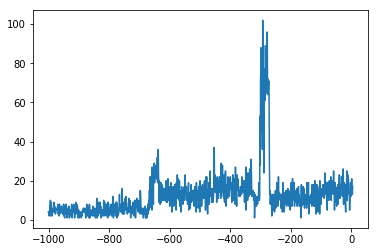

In [79]:
plt.plot(unique[0:1000],counts[0:1000])

In [80]:
del df['yearOfRegistration']
del df['monthOfRegistration']

### var: gearbox

In [81]:
df_gearbox = dict(zip(df.loc[:,'gearbox'].unique().tolist(),range(len(df.loc[:,'gearbox'].unique().tolist()))))
df_gearbox.keys()

dict_keys(['automatik', 'manuell', nan])

In [82]:
del df_gearbox[np.nan]

In [83]:
sum(df.loc[:,'gearbox'].isnull())

13064

In [84]:
for nstr in list(df_gearbox.keys()):
    if nstr in df.columns.values.tolist():
        df.loc[df.loc[:,'gearbox'] == nstr,nstr] = np.float32(1)
    else:
        df[nstr] = np.float32(0)
        df.loc[df.loc[:,'gearbox'] == nstr,nstr] = np.float32(1)

In [85]:
del df['gearbox']

### var: powerPS

In [86]:
df.loc[:,'powerPS'].describe()

count    250152.000000
mean        115.637776
std         186.713848
min           0.000000
25%          71.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

In [87]:
sum(df.loc[:,'powerPS'].isnull())

0

In [88]:
len(df.loc[df.loc[:,'powerPS'] < 30,:])

27072

In [89]:
len(df.loc[df.loc[:,'powerPS'] > 2200,:])

73

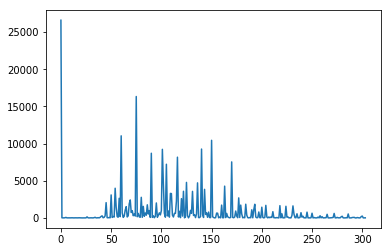

In [90]:
unique, counts = np.unique(df.loc[:,'powerPS'].values,return_counts=True)
plt.plot(unique[0:300],counts[0:300])

In [91]:
df.loc[:,'powerPS']

0         163.0
1          75.0
2         102.0
3         109.0
4         101.0
          ...  
250147      0.0
250148    101.0
250149    102.0
250150    100.0
250151    320.0
Name: powerPS, Length: 250152, dtype: float64

In [92]:
df.loc[:,'powerPS'] = df.loc[:,'powerPS'].astype(dtype=np.float32)

In [93]:
df.loc[df.loc[:,'powerPS'] < 30,'powerPS'] = np.nan
df.loc[df.loc[:,'powerPS'] > 2200,'powerPS'] = np.nan

In [94]:
sum(df.loc[:,'powerPS'].isnull())

27145

### var: model

In [95]:
df_model = dict(zip(df.loc[:,'model'].unique().tolist(),range(len(df.loc[:,'model'].unique().tolist()))))
df_model.keys()

dict_keys(['grand', 'golf', '3er', '2_reihe', '3_reihe', 'passat', 'polo', 'twingo', 'c_max', 'arosa', 'andere', '5er', 'civic', 'punto', 'e_klasse', 'kadett', 'fortwo', 'clio', '1er', 'b_klasse', 'signum', 'astra', nan, 'jetta', 'fiesta', 'vito', '156', 'escort', 'c_klasse', 'a4', 'ka', 'a1', 'insignia', 'transporter', 'focus', 'tt', '7er', '80', '147', '100', 'meriva', 'z_reihe', 'sorento', 'v40', 'ibiza', 'mustang', 'eos', 'fabia', 'a6', 'getz', 'almera', 'megane', 'lupo', 'a3', 'r19', 'zafira', 'caddy', 'mondeo', 'colt', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe', 'corsa', 'espace', 'sharan', '6_reihe', 'a_klasse', 'touran', 'up', 'scenic', 'kangoo', '5_reihe', 'yeti', 'octavia', 'rx_reihe', 'matiz', 'panda', 'c1', 'touareg', 'logan', 'spider', 'omega', 'cuore', 's_max', 'modus', 'x_reihe', 'a5', 'galaxy', 'viano', '1_reihe', 'c4', 'avensis', 'sl', 'q5', 'kaefer', 'santa', 'cooper', 'leon', 'sportage', '500', 'a8', 'glk', 'laguna', 'clk', 'primera', 's_klasse', 'a2', 'on

In [96]:
sum(df.loc[:,'model'].isnull())

12644

In [97]:
del df_model[np.nan]

In [98]:
for nstr in list(df_model.keys()):
    if nstr in df.columns.values.tolist():
        df.loc[df.loc[:,'model'] == nstr,nstr] = np.float32(1)
    else:
        df[nstr] = np.float32(0)
        df.loc[df.loc[:,'model'] == nstr,nstr] = np.float32(1)

In [99]:
del df['model']

### var: kilometer

In [100]:
df.loc[:,'kilometer'].describe()

count    250152.000000
mean     126487.275736
std       39336.796341
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [101]:
sum(df.loc[:,'kilometer'].isnull())

0

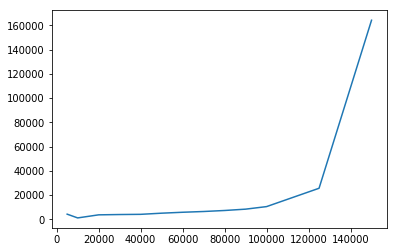

In [102]:
unique, counts = np.unique(df.loc[:,'kilometer'].values,return_counts=True)
plt.plot(unique,counts)

In [103]:
df.loc[:,'kilometer'] = df.loc[:,'kilometer'].astype(dtype=np.float32)

### var: fuelType

In [104]:
df_fuelType = dict(zip(df.loc[:,'fuelType'].unique().tolist(),range(len(df.loc[:,'fuelType'].unique().tolist()))))
df_fuelType.keys()

dict_keys(['diesel', 'benzin', nan, 'lpg', 'andere', 'hybrid', 'cng', 'elektro'])

In [105]:
sum(df.loc[:,'fuelType'].isnull())

21620

In [106]:
del df_fuelType[np.nan]

In [107]:
for nstr in list(df_fuelType.keys()):
    if nstr in df.columns.values.tolist():
        df.loc[df.loc[:,'fuelType'] == nstr,nstr] = np.float32(1)
    else:
        df[nstr] = np.float32(0)
        df.loc[df.loc[:,'fuelType'] == nstr,nstr] = np.float32(1)

In [108]:
del df['fuelType']

### var: notRepairedDamage

In [109]:
df_notRepairedDamage = dict(zip(df.loc[:,'notRepairedDamage'].unique().tolist(),range(len(df.loc[:,'notRepairedDamage'].unique().tolist()))))
df_notRepairedDamage

{nan: 0, 'nein': 1, 'ja': 2}

In [110]:
sum(df.loc[:,'notRepairedDamage'].isnull())

47821

In [111]:
df_notRepairedDamage = dict(zip(df.loc[:,'notRepairedDamage'].dropna().unique().tolist(),range(len(df.loc[:,'notRepairedDamage'].dropna().unique().tolist()))))
df_notRepairedDamage

{'nein': 0, 'ja': 1}

In [112]:
df.loc[:,'notRepairedDamage'] = df.loc[:,'notRepairedDamage'].replace(df_notRepairedDamage)

In [113]:
df.loc[:,'notRepairedDamage'] = df.loc[:,'notRepairedDamage'].astype(dtype=np.float32)

### var: dateCreated

In [114]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'],format = "%Y/%m/%d %H:%M:%S")

In [115]:
df['dateCreated'].describe()

count                  250152
unique                    108
top       2016-04-03 00:00:00
freq                     9775
first     2014-03-10 00:00:00
last      2016-04-07 00:00:00
Name: dateCreated, dtype: object

In [116]:
sum(df.loc[:,'dateCreated'].isnull())

0

In [117]:
df_dateCreated = df['dateCreated'] - df['dateCrawled']
df_dateCreated = df_dateCreated.dt.days

In [118]:
df_dateCreated.describe()

count    250152.000000
mean         -1.090381
std           2.380388
min        -738.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max          -1.000000
dtype: float64

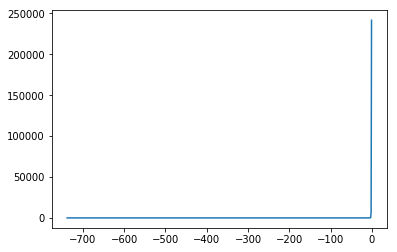

In [119]:
unique, counts = np.unique(df_dateCreated.dropna().values,return_counts=True)
plt.plot(unique,counts)

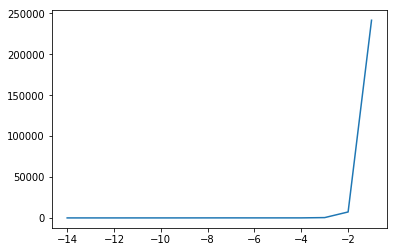

In [120]:
plt.plot(unique[70:],counts[70:])

In [121]:
unique

array([-738, -370, -287, -240, -212, -193, -179, -144, -135, -125, -119,
       -114, -110, -105, -104,  -95,  -94,  -93,  -86,  -82,  -74,  -70,
        -69,  -68,  -67,  -65,  -62,  -60,  -59,  -58,  -57,  -56,  -55,
        -53,  -52,  -50,  -49,  -48,  -47,  -45,  -44,  -43,  -42,  -41,
        -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,
        -29,  -28,  -27,  -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,
        -18,  -17,  -16,  -15,  -14,  -13,  -12,  -11,  -10,   -9,   -8,
         -7,   -6,   -5,   -4,   -3,   -2,   -1])

In [122]:
df.loc[:,'dateCreated'] = df_dateCreated.astype(dtype=np.float32)

### var: nrOfPictures

In [123]:
df.loc[:,'nrOfPictures'].describe()

count    250152.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: nrOfPictures, dtype: float64

In [124]:
sum(df.loc[:,'dateCreated'].isnull())

0

### var: postalCode

In [125]:
df.loc[:,'postalCode'].describe()

count    250152.000000
mean      50835.661574
std       25762.073567
min        1067.000000
25%       30519.000000
50%       49610.000000
75%       71522.000000
max       99998.000000
Name: postalCode, dtype: float64

In [126]:
df_postalCode = dict(zip(df.loc[:,'postalCode'].unique().tolist(),range(len(df.loc[:,'postalCode'].unique().tolist()))))
len(df_postalCode)

8068

In [127]:
df2head = ['country code','postal code','place name','admin name1','admin code1','admin name2',
'admin code2','admin name3','admin code3','latitude','longitude','accuracy']

In [128]:
df2 = pd.read_csv("/home/longa/03_tarolo/BME/dap/nagyhazi/DE.txt",sep='\t',names=df2head)
df2.head(3)

,country code,postal code,place name,admin name1,admin code1,admin name2,admin code2,admin name3,admin code3,latitude,longitude,accuracy
0,DE,1945,Grünewald,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.400,14.0000,NaN
1,DE,1945,Lindenau,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.400,13.7333,NaN
2,DE,1945,Hohenbocka,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.431,14.0098,NaN


In [129]:
depostaldict = dict(zip(df2.loc[:,'postal code'].values.tolist(),df2.loc[:,'admin name1'].values.tolist()))

In [130]:
df_postalCode_temp = df.loc[:,'postalCode'].replace(depostaldict)

In [131]:
count = []
items = []
for item in df_postalCode_temp.unique().tolist():
    count.append(len(df_postalCode_temp[df_postalCode_temp == item]))
    items.append(item)

In [132]:
df2_postdict = dict(zip(items,count))
df2_postdict

{'Bayern': 37016,
 'Nordrhein-Westfalen': 60133,
 'Rheinland-Pfalz': 14466,
 'Niedersachsen': 29141,
 'Hessen': 22803,
 'Sachsen-Anhalt': 4879,
 'Baden-Württemberg': 28506,
 'Sachsen': 7457,
 'Berlin': 10517,
 'Mecklenburg-Vorpommern': 3822,
 'Hamburg': 4689,
 'Schleswig-Holstein': 9707,
 'Thüringen': 4538,
 'Saarland': 4264,
 'Brandenburg': 5901,
 'Bremen': 2181,
 6868.0: 9,
 99095.0: 13,
 6485.0: 10,
 99090.0: 11,
 15712.0: 22,
 39217.0: 5,
 87567.0: 3,
 15713.0: 10,
 99898.0: 1,
 85045.0: 1,
 96529.0: 4,
 12058.0: 1,
 1068.0: 1,
 27632.0: 28,
 6772.0: 6,
 85071.0: 1,
 9434.0: 3,
 30176.0: 2,
 7558.0: 1}

In [133]:
df2_postdict

{'Bayern': 37016,
 'Nordrhein-Westfalen': 60133,
 'Rheinland-Pfalz': 14466,
 'Niedersachsen': 29141,
 'Hessen': 22803,
 'Sachsen-Anhalt': 4879,
 'Baden-Württemberg': 28506,
 'Sachsen': 7457,
 'Berlin': 10517,
 'Mecklenburg-Vorpommern': 3822,
 'Hamburg': 4689,
 'Schleswig-Holstein': 9707,
 'Thüringen': 4538,
 'Saarland': 4264,
 'Brandenburg': 5901,
 'Bremen': 2181,
 6868.0: 9,
 99095.0: 13,
 6485.0: 10,
 99090.0: 11,
 15712.0: 22,
 39217.0: 5,
 87567.0: 3,
 15713.0: 10,
 99898.0: 1,
 85045.0: 1,
 96529.0: 4,
 12058.0: 1,
 1068.0: 1,
 27632.0: 28,
 6772.0: 6,
 85071.0: 1,
 9434.0: 3,
 30176.0: 2,
 7558.0: 1}

In [134]:
df2_postdict_df = pd.DataFrame(list(df2_postdict.items()),columns=['place','sum'])

In [135]:
postcerr = df2_postdict_df.loc[df2_postdict_df.loc[:,'sum'] < 50,'place'].values.tolist()
depostaldict2 = dict(zip(postcerr,[np.nan for x in range(len(postcerr))]))

In [136]:
df_postalCode_temp = df_postalCode_temp.replace(depostaldict2)

In [137]:
count = []
items = []
for item in df_postalCode_temp.unique().tolist():
    count.append(len(df_postalCode_temp[df_postalCode_temp == item]))
    items.append(item)

In [138]:
df2_postdict = dict(zip(items,count))
df2_postdict

{'Bayern': 37016,
 'Nordrhein-Westfalen': 60133,
 'Rheinland-Pfalz': 14466,
 'Niedersachsen': 29141,
 'Hessen': 22803,
 'Sachsen-Anhalt': 4879,
 'Baden-Württemberg': 28506,
 'Sachsen': 7457,
 'Berlin': 10517,
 'Mecklenburg-Vorpommern': 3822,
 'Hamburg': 4689,
 'Schleswig-Holstein': 9707,
 'Thüringen': 4538,
 'Saarland': 4264,
 'Brandenburg': 5901,
 'Bremen': 2181,
 nan: 0}

In [139]:
df2_postdict

{'Bayern': 37016,
 'Nordrhein-Westfalen': 60133,
 'Rheinland-Pfalz': 14466,
 'Niedersachsen': 29141,
 'Hessen': 22803,
 'Sachsen-Anhalt': 4879,
 'Baden-Württemberg': 28506,
 'Sachsen': 7457,
 'Berlin': 10517,
 'Mecklenburg-Vorpommern': 3822,
 'Hamburg': 4689,
 'Schleswig-Holstein': 9707,
 'Thüringen': 4538,
 'Saarland': 4264,
 'Brandenburg': 5901,
 'Bremen': 2181,
 nan: 0}

In [140]:
df.loc[:,'postalCode'] = df_postalCode_temp

In [141]:
sum(df.loc[:,'postalCode'].isnull())

132

In [142]:
df1_postal_vars = df.loc[:,'postalCode'].dropna().unique().tolist()

In [143]:
for nstr in df1_postal_vars:
    df[nstr] = np.float32(0)
    df.loc[df.loc[:,'postalCode'] == nstr,nstr] = np.float32(1)

In [144]:
del df['postalCode']

### var: lastSeen

In [145]:
df['lastSeen'] = pd.to_datetime(df['lastSeen'],format = "%Y/%m/%d %H:%M:%S")

In [146]:
sum(df.loc[:,'lastSeen'].isnull())

0

In [147]:
df_lastSeen = df['dateCrawled'] - df['lastSeen']

In [148]:
df_lastSeen = df_lastSeen.dt.days*24 + df_lastSeen.dt.seconds/60/60/60

In [149]:
df['lastSeen'] = df_lastSeen

In [150]:
del df['lastSeen']

### var: id

In [151]:
df.loc[:,'id'].describe()

count    250152.000000
mean     185870.975067
std      107353.589860
min           3.000000
25%       92948.750000
50%      185913.500000
75%      278843.500000
max      371824.000000
Name: id, dtype: float64

In [152]:
sum(df.loc[:,'lastSeen'].isnull())

0

In [153]:
del df['lastSeen']

In [154]:
df.head()

,seller,offerType,powerPS,kilometer,notRepairedDamage,dateCreated,nrOfPictures,lastSeen,label,tuev,tdi,golf,2.0,1.6,1.4,automatik,klima,neu,16v,sport,polo,corsa,1.2,1.9,cabrio,cdi,top,1.8,astra,passat,a4,edition,navi,kombi,avant,zustand,variant,coupe,touring,a3,leder,quattro,a6,focus,ahk,diesel,xenon,fiesta,3.0,line,1.0,200,twingo,dsg,tsi,highline,lpg,comfortline,tronic,vectra,avantgarde,sehr,gepflegt,elegance,206,tdci,1.hand,punto,cdti,320,mondeo,bj,paket,touran,clio,220,6v,caravan,2.2,kompressor,scheckheft,zafira,turbo,7g,classic,2.5,180,gti,megane,bastler,320d,neue,turnier,ibiza,lupo,t4,1.3,316i,hdi,tausch,318i,ka,fortwo,voll,dci,sportback,plus,tfsi,6n,bereift,style,trendline,combi,cooper,schwarz,ambiente,e36,320i,vollausstattung,servo,fabia,klasse,bluemotion,e46,octavia,gruene,amg,plakette,limousine,12v,gepflegter,pdc,comfort,fsi,75,multivan,nur,suche,ambition,facelift,clk,8v,compact,80,blueefficiency,110,2.hand,500,4x4,caddy,titanium,alu,micra,sportpaket,ohne,ghia,sitzheizung,sharan,gt,exclusive,fahrbereit,guter,scenic,4motion,garantie,ausstattung,530d,super,t5,tiptronic,leon,omega,350,standheizung,schiebedach,tausche,2.4,slk,jahre,wenig,1.1,tuerer,roadster,technology,trend,tt,fap,civic,1.5,grand,laguna,max,230,307,1.7,525d,aus,2018,bastlerfahrzeug,multitronic,transporter,ci,2.7,100,170,galaxy,zoll,kein,60,140,panorama,207,ml,520i,crdi,gasanlage,gegen,lkw,passion,cd,meriva,90,gang,hu,tempomat,2000,ein,motorschaden,golf6,silber,280,318,a5,yaris,323,tuev au,160,4matic,lang,unfallfrei,verkauf,e39,zahnriemen,150,twin,gut,one,liter,tuerig,original,up,kangoo,116i,vito,alufelgen,grandtour,schoener,sw,106,bora,x3,tiguan,arosa,scheckheftgepflegt,x5,tuning,dti,270,eco,iner,325i,beetle,corolla,tourer,cl,523i,mein,fahrzeug,berlingo,blue,118d,fox,modell,8l,blau,dynamique,anhaengerkupplung,mx,faltdach,b5,escort,attraction,colt,ii,316,tigra,au,tuv,rs,190,iii,18,active,gl,9n,cosmo,suv,kleinwagen,bus,andere,benzin,hybrid,cng,elektro,jeep,volkswagen,bmw,peugeot,mazda,renault,ford,seat,mercedes_benz,honda,fiat,opel,smart,hyundai,sonstige_autos,alfa_romeo,mitsubishi,audi,kia,volvo,skoda,nissan,citroen,toyota,chevrolet,dacia,suzuki,daihatsu,mini,chrysler,porsche,rover,lancia,daewoo,subaru,jaguar,saab,land_rover,trabant,lada,Registration,manuell,3er,2_reihe,3_reihe,c_max,5er,e_klasse,kadett,1er,b_klasse,signum,jetta,156,c_klasse,a1,insignia,7er,147,z_reihe,sorento,v40,mustang,eos,getz,almera,r19,m_klasse,i_reihe,espace,6_reihe,a_klasse,5_reihe,yeti,rx_reihe,matiz,panda,c1,touareg,logan,spider,cuore,s_max,modus,x_reihe,viano,1_reihe,c4,avensis,sl,q5,kaefer,santa,sportage,a8,glk,primera,s_klasse,a2,scirocco,159,qashqai,carisma,accord,phaeton,cordoba,verso,swift,rav,kuga,picanto,boxster,superb,stilo,alhambra,911,mx_reihe,m_reihe,transit,ypsilon,galant,justy,c3,agila,duster,4_reihe,v50,c_reihe,v_klasse,rio,seicento,cc,carnival,forfour,sprinter,jazz,ptcruiser,q3,cr_reihe,xc_reihe,spark,v70,impreza,ducato,x_trail,toledo,altea,calibra,bravo,c5,ceed,q7,combo,s_type,captiva,fusion,cayenne,c2,range_rover_evoque,freelander,aygo,sandero,note,mii,900,lancer,forester,601,pajero,cx_reihe,voyager,sirion,s60,clubman,vivaro,lanos,tucson,auris,cherokee,jimny,roomster,x_type,850,citigo,crossfire,juke,outlander,doblo,move,v60,145,6er,lybra,niva,antara,b_max,300c,kalos,exeo,discovery,aveo,range_rover_sport,nubira,croma,legacy,wrangler,navara,lodgy,amarok,g_klasse,defender,musa,Bayern,Nordrhein-Westfalen,Rheinland-Pfalz,Niedersachsen,Hessen,Sachsen-Anhalt,Baden-Württemberg,Sachsen,Berlin,Mecklenburg-Vorpommern,Hamburg,Schleswig-Holstein,Thüringen,Saarland,Brandenburg,Bremen
0,0.0,0.0,163.0,125000.0,NaN,-1.0,0.0,-527.998727,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### var: Label

In [155]:
len(df)

250152

In [156]:
sum(df.loc[:,'label'].isnull())

0

In [157]:
df.drop(df.loc[df.loc[:,'label'].isnull(),:].index,inplace=True)

In [158]:
sum(df.loc[:,'label'].isnull())

0

## Clean dataset

In [7]:
var_target = 'label'
variables = pd.read_csv('variables2.csv',names=['var'])
variables = variables['var'].values.tolist()

In [5]:
variables = pd.read_csv('variables2.csv',names=['var'])
variables = variables['var'].values.tolist()
var_target = 'label'

In [6]:
df_train = pd.read_csv('df_train_clean.csv').astype(dtype=np.float32)
df_test = pd.read_csv('df_test_clean.csv').astype(dtype=np.float32)
fnames =  df_train[variables].columns.values.tolist()

In [7]:
variables = df_train.columns.values.tolist()
variables.remove('label')

In [8]:
len(variables)

541

In [9]:
fnames =  df_train[variables].columns.values.tolist()

In [10]:
train_dmatr = xgb.DMatrix(df_train[variables].values, label=df_train[var_target].values, feature_names = fnames)
test_dmatr = xgb.DMatrix(df_test[variables].values, feature_names = fnames)

In [10]:
#weight
scale_pos_weight = np.sum(df_train.loc[:,[var_target]] == 0).values[0]/np.sum(df_train.loc[:,[var_target]] == 1).values[0]
spw_lt = [scale_pos_weight*0.9,scale_pos_weight,scale_pos_weight*1.1]
spw_exact = [scale_pos_weight]
#manual
spw_exact_tune = [scale_pos_weight*1.1]

In [5]:
#df.to_csv('df_train_clean.csv',index=False)

# XGBoost

# Data

In [ ]:
X = df.loc[:,[*variables]]
y = df.loc[:,[var_target]].values.ravel()

### Kfold

In [163]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)

In [164]:
import sklearn.metrics.scorer
from sklearn.metrics.scorer import recall_scorer
from sklearn.metrics.scorer import precision_scorer
from sklearn.metrics.scorer import roc_auc_scorer

In [165]:
nomr = 0
mnomr = 0
pmrs = True

lscorer = [recall_scorer,precision_scorer,roc_auc_scorer]
dscorer = {0:'recall_scorer',1:'precision_scorer',2:'roc_auc_scorer'}
scorer = 2

def resetrcount():
    global nomr
    global mnomr
    nomr = 0
    mnomr = 0   
def setmaxnomr(inmax):
    global mnomr
    mnomr = inmax

def my_scorer(*args):
    score = lscorer[scorer](*args)
    global pmrs
    if pmrs:
        global nomr
        nomr += 1
        clear_output(wait=True)
        print('{}/{} - {}:{}'.format(nomr,mnomr,dscorer[scorer],score))
    pmrs = not pmrs
    return score

In [166]:
scale_pos_weight = np.sum(df.loc[:,[var_target]] == 0).values[0]/np.sum(df.loc[:,[var_target]] == 1).values[0]
spw_lt = [scale_pos_weight*0.9,scale_pos_weight,scale_pos_weight*1.1]
spw_exact = [scale_pos_weight]
spw_exact_tune = [scale_pos_weight*1.1]

In [167]:
### GPU
xgb_param = {'objective':'binary:logistic','tree_method':'gpu_hist','predictor':'gpu_predictor','seed':52,'n_jobs':-1,'eval_metric':'logloss'}
grid_params = {'cv' : kfold,'scoring':my_scorer, 'return_train_score':True}

In [168]:
cv_params = {'n_estimators':[200],'max_depth': [10,12,15,17,20,25],'scale_pos_weight':spw_exact_tune,
             'min_child_weight': [100],'learning_rate': [0.2],'subsample': [0.5],
             'colsample_bytree': [0.5], 'gamma':[0.5]}

In [169]:
def gkombfrlist(lov):
    letrs = 'ABCDEFGHIJKLMNOPKRSTUVWXYZ'
    glist = []
    for i in range(len(lov)):
        tgl = []
        for n in range(lov[i]):
            tgl.append('{}{}'.format(letrs[i],n))
        glist.append(tgl)
    return list(itertools.product(*glist))

In [170]:
len(gkombfrlist([len(x) for x in cv_params.values()]))

6

### Model

In [171]:
model = xgb.XGBClassifier(**xgb_param)
optimized_GBM = GridSearchCV(model, cv_params, **grid_params)

In [172]:
#Score hack
resetrcount()
setmaxnomr(len(gkombfrlist([len(x) for x in cv_params.values()]))*kfold.n_splits)

In [ ]:
tst = time.ctime()
tmp = time.time()
optimized_GBM.fit(X, y)
tres = time.time() - tmp
print("GPU Training Time: %s seconds" % (str(tres)))
print('Start: {}'.format(tst))
print('Start: {}'.format(time.ctime()))

9/18 - roc_auc_scorer:0.8189955911233131


### XGBoost fine tuning

In [782]:
from xgboost.sklearn import XGBClassifier

In [783]:
print(len(variables),var_target)

43 label


In [784]:
scale_pos_weight = np.sum(df.loc[:,[var_target]] == 0).values[0]/np.sum(df.loc[:,[var_target]] == 1).values[0]
spw_lt = [scale_pos_weight*0.9,scale_pos_weight,scale_pos_weight*1.1]
spw_exact = [scale_pos_weight]

In [785]:
scale_pos_weight = np.float32(spw_exact[0])

In [11]:
fparams = {'eta': 0.1, 'seed':52, 'subsample': 0.9, 'colsample_bytree': 0.9,
           'objective': 'binary:logistic', 'max_depth':16, 'min_child_weight':17,
           'scale_pos_weight':1.5, 'tree_method' : 'auto', 'gamma':0.3
          } 

In [670]:
%memit

peak memory: 5457.99 MiB, increment: 0.00 MiB


In [671]:
fnames =  df[variables].columns.values.tolist()
xgmtr = xgb.DMatrix(df[variables].values, label=df[var_target].values, feature_names = fnames)

In [672]:
%memit

peak memory: 5458.01 MiB, increment: 0.00 MiB


In [ ]:
cv_xgbm = xgb.cv(params = fparams, dtrain = train_dmatr, num_boost_round = 3000, nfold = 5, metrics = ['auc'], 
                early_stopping_rounds = 100,  verbose_eval=True)

In [177]:
filt_cv_res = cv_xgbm['test-auc-mean'] == cv_xgbm['test-auc-mean'].max()
cv_xgbm.loc[filt_cv_res,'test-auc-mean']

964    0.856624
Name: test-auc-mean, dtype: float64

In [11]:
fparams = {'eta': 0.1, 'seed':52, 'subsample': 0.9, 'colsample_bytree': 0.9,
           'objective': 'binary:logistic', 'max_depth':16, 'min_child_weight':17,
           'scale_pos_weight':1.5, 'tree_method' : 'auto', 'gamma':0.3
          }
watchlist = [(train_dmatr, 'eval')]
num_round = 892
final_gb = xgb.train(fparams,
                     train_dmatr,
                     num_round ,
                     watchlist,
                     verbose_eval = True,
                    )   

[0]	eval-error:0.283648
[1]	eval-error:0.272302
[2]	eval-error:0.265083
[3]	eval-error:0.262532
[4]	eval-error:0.259858
[5]	eval-error:0.259382
[6]	eval-error:0.258135
[7]	eval-error:0.257731
[8]	eval-error:0.256224
[9]	eval-error:0.254217
[10]	eval-error:0.253206
[11]	eval-error:0.251883
[12]	eval-error:0.250995
[13]	eval-error:0.249356
[14]	eval-error:0.248457
[15]	eval-error:0.247014
[16]	eval-error:0.246282
[17]	eval-error:0.245283
[18]	eval-error:0.243784
[19]	eval-error:0.243148
[20]	eval-error:0.241805
[21]	eval-error:0.241237
[22]	eval-error:0.239454
[23]	eval-error:0.238923
[24]	eval-error:0.237296
[25]	eval-error:0.23632
[26]	eval-error:0.235617
[27]	eval-error:0.234921
[28]	eval-error:0.234182
[29]	eval-error:0.233562
[30]	eval-error:0.232846
[31]	eval-error:0.232083
[32]	eval-error:0.231691
[33]	eval-error:0.231343
[34]	eval-error:0.230612
[35]	eval-error:0.23012
[36]	eval-error:0.229293
[37]	eval-error:0.229005
[38]	eval-error:0.228681
[39]	eval-error:0.228237
[40]	eval-er

[321]	eval-error:0.165943
[322]	eval-error:0.165791
[323]	eval-error:0.165639
[324]	eval-error:0.165675
[325]	eval-error:0.165531
[326]	eval-error:0.165423
[327]	eval-error:0.165295
[328]	eval-error:0.165196
[329]	eval-error:0.16508
[330]	eval-error:0.165076
[331]	eval-error:0.165064
[332]	eval-error:0.16478
[333]	eval-error:0.164764
[334]	eval-error:0.164584
[335]	eval-error:0.164412
[336]	eval-error:0.164348
[337]	eval-error:0.164352
[338]	eval-error:0.164324
[339]	eval-error:0.164272
[340]	eval-error:0.164176
[341]	eval-error:0.163932
[342]	eval-error:0.163896
[343]	eval-error:0.163876
[344]	eval-error:0.16376
[345]	eval-error:0.163696
[346]	eval-error:0.163621
[347]	eval-error:0.163517
[348]	eval-error:0.163165
[349]	eval-error:0.163105
[350]	eval-error:0.163009
[351]	eval-error:0.162921
[352]	eval-error:0.162797
[353]	eval-error:0.162753
[354]	eval-error:0.162625
[355]	eval-error:0.162649
[356]	eval-error:0.162505
[357]	eval-error:0.162489
[358]	eval-error:0.162433
[359]	eval-erro

[638]	eval-error:0.136853
[639]	eval-error:0.136669
[640]	eval-error:0.136629
[641]	eval-error:0.136521
[642]	eval-error:0.136457
[643]	eval-error:0.136353
[644]	eval-error:0.136225
[645]	eval-error:0.136005
[646]	eval-error:0.135977
[647]	eval-error:0.135841
[648]	eval-error:0.135765
[649]	eval-error:0.135713
[650]	eval-error:0.135642
[651]	eval-error:0.13563
[652]	eval-error:0.135578
[653]	eval-error:0.135526
[654]	eval-error:0.135462
[655]	eval-error:0.135354
[656]	eval-error:0.135322
[657]	eval-error:0.135242
[658]	eval-error:0.135226
[659]	eval-error:0.13519
[660]	eval-error:0.134994
[661]	eval-error:0.134806
[662]	eval-error:0.134842
[663]	eval-error:0.134666
[664]	eval-error:0.134606
[665]	eval-error:0.134338
[666]	eval-error:0.134318
[667]	eval-error:0.13429
[668]	eval-error:0.134322
[669]	eval-error:0.134242
[670]	eval-error:0.134186
[671]	eval-error:0.134039
[672]	eval-error:0.133995
[673]	eval-error:0.133891
[674]	eval-error:0.133851
[675]	eval-error:0.133859
[676]	eval-erro

In [12]:
final_gb.save_model('DAP_xgboost_2_1.model')
final_gb.dump_model('DAP_xgboost_2_1.raw.txt')# dump model with feature map

In [ ]:
# https://github.com/dmlc/xgboost/tree/master/demo/binary_classification

In [13]:
xfm1res = final_gb.get_fscore()

In [14]:
pd.set_option('display.max_rows', 500)
xfm1resdf = pd.DataFrame()
xfm1resdf['res'] = pd.Series(xfm1res,index=xfm1res.keys())
xfm1resdf.sort_values(by='res',ascending=False, inplace=True)

In [16]:
len(xfm1resdf.loc[xfm1resdf.loc[:,'res'] > 40,:])

275

In [17]:
variables2series = pd.Series(xfm1resdf.loc[xfm1resdf.loc[:,'res'] > 40,:].index.values)
variables2series.to_csv('variables3.csv',index=False)

## Test data

In [244]:
# dateCrawled

In [245]:
df2 = pd.read_csv("/home/longa/03_tarolo/BME/dap/nagyhazi/autos_testing_final.csv",sep='|')

In [246]:
df2['dateCrawled'] = pd.to_datetime(df2['dateCrawled'],format = "%Y/%m/%d %H:%M:%S")

In [247]:
#name

In [248]:
df2_name = df2.loc[:,'name'].tolist()
len(df2_name)

107208

In [249]:
df2_name_uniq = df2.loc[:,'name'].tolist()
tt = [(x.lower()) for x in df2_name]
cml = ["'","!","#","$","%","&","*","+","/","~","|",";"," "]
for m in cml:
    tt = [x.replace(m," ") for x in tt]
len(tt)

107208

In [250]:
t2 = [x.replace("benz","") for x in t2]
t2 = [x.replace("romeo","") for x in t2]
t2 = [x.replace("20_v","20v") for x in t2]
t2 = [x.replace("12_v","12v") for x in t2]
t2 = [x.replace("1_hand","1.hand") for x in t2]
t2 = [x.replace("2._hand","2.hand") for x in t2]
t2 = [x.replace("2_hand","2.hand") for x in t2]
t2 = [x.replace("neu.","neu") for x in t2]
t2 = [x.replace("golf4","golf") for x in t2]
t2 = [x.replace("3.0tdi","3.0_tdi") for x in t2]
t2 = [x.replace("neues","neue") for x in t2]
t2 = [x.replace("2.5tdi","2.5 tdi") for x in t2]
t2 = [x.replace("sportfahrwerk","sport") for x in t2]
t2 = [x.replace("1.8l","1.8") for x in t2]
t2 = [x.replace("2.2i","2.0") for x in t2
t2 = [x.replace("neuer","neue") for x in t2]
t2 = [x.replace("new","neue") for x in t2]
t2 = [x.replace("1.6i","1.6") for x in t2]
t2 = [x.replace("2.0t","2.0") for x in t2]
t2 = [x.replace("neuem","neue") for x in t2]
t2 = [x.replace("sportline","sport") for x in t2]
t2 = [x.replace("klimaanlage","klima") for x in t2]
t2 = [x.replace("klimaautomatik","klima") for x in t2]
t2 = [x.replace("citro?n","citroen") for x in t2]
t2 = [x.replace("vw","volkswagen") for x in t2]
t2 = [x.replace("tuv.","tuev") for x in t2]
t2 = [x.replace("cabriolet","cabrio") for x in t2]
t2 = [x.replace("limousineusine","limousine") for x in t2]
t2 = [x.replace("aut.","automatik") for x in t2]
t2 = [x.split('_') for x in t2]
len(t2)

107208

In [251]:
tt2 = [rvil(x,"mercedes","mercedes_benz") for x in tt2]
tt2 = [rvil(x,"alfa","alfa_romeo") for x in tt2]

In [252]:
for nstr in fin_wrd_lt:
    df2.loc[:,nstr] = np.float32(0)
    df2.loc[[string_in_row(nstr,r) for r in tt2],nstr] = np.float32(1)

In [253]:
del df2['name']

In [254]:
# seller

In [255]:
df2.loc[:,'seller'] = df2.loc[:,'seller'].replace(df_seller).astype(dtype=np.float32)

In [256]:
# offerType

In [257]:
df2.loc[:,'offerType'] = df2.loc[:,'offerType'].replace(df_offertype).astype(dtype=np.float32)

In [258]:
# brand

In [259]:
df2.loc[:,'helper'] = np.float32(1)

In [260]:
for nstr in list(df_brand.keys()):
    df2.loc[:,nstr] = np.float32(0)
    df2.loc[df2.loc[:,'brand'] == nstr,nstr] = np.float32(1)

In [261]:
del df2['brand']

In [263]:
# vehicleType

In [264]:
for nstr in list(df_vehicletype.keys()):
    df2.loc[df2.loc[:,'vehicleType'] == nstr,nstr] = np.float32(1)

In [265]:
del df2['vehicleType']

In [266]:
# monthOfRegistration - yearOfRegistration

In [267]:
df2.loc[df2.loc[:,'monthOfRegistration'] == 0,'monthOfRegistration'] = 1

In [268]:
df2.loc[
    df2.loc[:,'yearOfRegistration'] < 1678,'yearOfRegistration'
] = 1678

In [269]:
df2['Registration'] = df2.loc[:,'yearOfRegistration'].astype(dtype=np.int16).map(str) + '-' + df2.loc[:,'monthOfRegistration'].astype(dtype=np.int16).map(str) + '-' + '1 00:00:00'

In [270]:
df2['Registration'] = df2['Registration'].apply(lambda x: pd.to_datetime(dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"),format = "%Y-%m-%d %H:%M:%S"))

In [271]:
ddict = {}
n = 0
for n in range(len(df2['dateCrawled'])):
    t = df2['dateCrawled'][n] - df2['Registration'][n]
    ddict[n] = t.days

In [272]:
pds_ddict = pd.Series(ddict)

In [273]:
df2['Registration'] = pds_ddict.astype(dtype=np.float32)

In [274]:
del df2['yearOfRegistration']
del df2['monthOfRegistration']

In [275]:
# gearbox

In [277]:
for nstr in list(df_gearbox.keys()):
    if nstr in df2.columns.values.tolist():
        df2.loc[df2.loc[:,'gearbox'] == nstr,nstr] = np.float32(1)
    else:
        df2[nstr] = np.float32(0)
        df2.loc[df2.loc[:,'gearbox'] == nstr,nstr] = np.float32(1)

In [280]:
del df2['gearbox']

In [281]:
# powerps

In [282]:
df2.loc[:,'powerPS'] = df2.loc[:,'powerPS'].astype(dtype=np.float32)

In [283]:
df2.loc[df2.loc[:,'powerPS'] < 30,'powerPS'] = np.nan
df2.loc[df2.loc[:,'powerPS'] > 2200,'powerPS'] = np.nan

In [285]:
# model

In [286]:
for nstr in list(df_model.keys()):
    if nstr in df2.columns.values.tolist():
        df2.loc[df2.loc[:,'model'] == nstr,nstr] = np.float32(1)
    else:
        df2[nstr] = np.float32(0)
        df2.loc[df2.loc[:,'model'] == nstr,nstr] = np.float32(1)

In [287]:
del df2['model']

In [288]:
# kilometer

In [289]:
df2.loc[:,'kilometer'] = df2.loc[:,'kilometer'].astype(dtype=np.float32)

In [290]:
#fueltype

In [291]:
for nstr in list(df_fuelType.keys()):
    if nstr in df2.columns.values.tolist():
        df2.loc[df2.loc[:,'fuelType'] == nstr,nstr] = np.float32(1)
    else:
        df2[nstr] = np.float32(0)
        df2.loc[df2.loc[:,'fuelType'] == nstr,nstr] = np.float32(1)

In [292]:
del df2['fuelType']

In [293]:
# notRepairedDamage

In [294]:
df2.loc[:,'notRepairedDamage'] = df2.loc[:,'notRepairedDamage'].replace(df_notRepairedDamage)

In [295]:
df2.loc[:,'notRepairedDamage'] = df2.loc[:,'notRepairedDamage'].astype(dtype=np.float32)

In [296]:
# dateCreated

In [297]:
df2['dateCreated'] = pd.to_datetime(df2['dateCreated'],format = "%Y/%m/%d %H:%M:%S")

In [298]:
df_dateCreated = df2['dateCreated'] - df2['dateCrawled']
df_dateCreated = df_dateCreated.dt.days

In [299]:
df2.loc[:,'dateCreated'] = df_dateCreated.astype(dtype=np.float32)

In [300]:
# postalCode

In [301]:
df2.loc[:,'postalCode'] = df2.loc[:,'postalCode'].replace(depostaldict)

In [302]:
for nstr in df1_postal_vars:
    df2[nstr] = np.float32(0)
    df2.loc[df2.loc[:,'postalCode'] == nstr,nstr] = np.float32(1)

In [303]:
del df2['postalCode']

In [304]:
# lastSeen

In [305]:
df2['lastSeen'] = pd.to_datetime(df2['lastSeen'],format = "%Y/%m/%d %H:%M:%S")

In [306]:
df_lastSeen = df2['dateCrawled'] - df2['lastSeen']

In [307]:
df_lastSeen = df_lastSeen.dt.days*24 + df_lastSeen.dt.seconds/60/60/60

In [308]:
df2['lastSeen'] = df_lastSeen

In [309]:
del df2['dateCrawled']

In [310]:
#id

In [311]:
# del df['id']

In [314]:
len(df2.columns.values)

543

In [313]:
len(df.columns.values)

542

In [323]:
df2.to_csv('df_test_clean.csv',index=False)

In [315]:
len(df[variables].columns.values)

126

In [316]:
len(df2[variables].columns.values)

126

# Prediction

In [756]:
fnames =  df[variables].columns.values.tolist()
xgmte = xgb.DMatrix(df2[variables].values, feature_names = fnames)

In [758]:
y_pred = final_gb.predict(xgmte)

In [759]:
dfres = pd.DataFrame()
dfres['id'] = df2['id']

In [760]:
dfres.loc[:,'label'] = y_pred

In [761]:
dfres.to_csv('autos_submission2.csv',index=False)

In [762]:
dfsub = pd.read_csv("autos_submission.csv")

In [763]:
dfsub.head()

,id,label
0,1.0,0.141615
1,5.0,0.319741
2,8.0,0.334041
3,9.0,0.547345
4,15.0,0.444139
